In [1]:
import pandas as pd

# Read dataset
df = pd.read_csv("Dataset.csv")
print(df)


                         Name (English) Name (Chinese) Region of Focus  \
0              Yang Xinmeng (Abby Yang)            杨欣萌     Anglosphere   
1                  CGTN Culture Express            NaN     Anglosphere   
2        All-China Students' Federation         中华全国学联           China   
3     Chen Zhong (Dechinghutay / Ghoti)             陈重     Afghanistan   
4                            Yang Sheng            NaN     Anglosphere   
...                                 ...            ...             ...   
3334                                NaN            NaN             NaN   
3335                                NaN            NaN             NaN   
3336                                NaN            NaN             NaN   
3337                                NaN            NaN             NaN   
3338                                NaN            NaN             NaN   

     Language          Entity owner (English) Entity owner (Chinese)  \
0     English         China Media Group

In [2]:
# Remove Unwanted columns
df.drop(columns=["Name (Chinese)", "Entity owner (Chinese)", "Parent entity (Chinese)", "Unnamed: 26", "Unnamed: 27", "Unnamed: 28"], axis=1, inplace=True)
df.drop(df[df["Name (English)"].isna()].index, inplace=True)


In [3]:
# Summaries the content of Dataframe
print("Name of Columns: -")
for col in df.columns:
    print(col + " has # nan value: " + str(df[col].isna().sum()))


Name of Columns: -
Name (English) has # nan value: 0
Region of Focus has # nan value: 0
Language has # nan value: 0
Entity owner (English) has # nan value: 0
Parent entity (English) has # nan value: 0
X (Twitter) handle has # nan value: 185
X (Twitter) URL has # nan value: 185
X (Twitter) Follower # has # nan value: 185
Facebook page has # nan value: 432
Facebook URL has # nan value: 432
Facebook Follower # has # nan value: 432
Instragram page has # nan value: 619
Instagram URL has # nan value: 619
Instagram Follower # has # nan value: 619
Threads account has # nan value: 723
Threads URL has # nan value: 723
Threads Follower # has # nan value: 723
YouTube account has # nan value: 599
YouTube URL has # nan value: 599
YouTube Subscriber # has # nan value: 599
TikTok account has # nan value: 637
TikTok URL has # nan value: 637
TikTok Subscriber # has # nan value: 640


In [4]:
# Clean rows to have "" or 0 values rather than NaN values
df['X (Twitter) handle'] = df['X (Twitter) handle'].fillna('')
df['X (Twitter) URL'] = df['X (Twitter) URL'].fillna('')
df['X (Twitter) Follower #'] = df['X (Twitter) Follower #'].fillna(0)
df['Facebook page'] = df['Facebook page'].fillna('')
df['Facebook URL'] = df['Facebook URL'].fillna('')
df['Facebook Follower #'] = df['Facebook Follower #'].fillna(0)
df['Instragram page'] = df['Instragram page'].fillna('')
df['Instagram URL'] = df['Instagram URL'].fillna('')
df['Instagram Follower #'] = df['Instagram Follower #'].fillna(0)
df['Threads account'] = df['Threads account'].fillna('')
df['Threads URL'] = df['Threads URL'].fillna('')
df['Threads Follower #'] = df['Threads Follower #'].fillna(0)
df['YouTube account'] = df['YouTube account'].fillna('')
df['YouTube URL'] = df['YouTube URL'].fillna('')
df['YouTube Subscriber #'] = df['YouTube Subscriber #'].fillna(0)
df['TikTok account'] = df['TikTok account'].fillna('')
df['TikTok URL'] = df['TikTok URL'].fillna('')
df['TikTok Subscriber #'] = df['TikTok Subscriber #'].fillna(0)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 757
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name (English)           758 non-null    object 
 1   Region of Focus          758 non-null    object 
 2   Language                 758 non-null    object 
 3   Entity owner (English)   758 non-null    object 
 4   Parent entity (English)  758 non-null    object 
 5   X (Twitter) handle       758 non-null    object 
 6   X (Twitter) URL          758 non-null    object 
 7   X (Twitter) Follower #   758 non-null    object 
 8   Facebook page            758 non-null    object 
 9   Facebook URL             758 non-null    object 
 10  Facebook Follower #      758 non-null    object 
 11  Instragram page          758 non-null    object 
 12  Instagram URL            758 non-null    object 
 13  Instagram Follower #     758 non-null    object 
 14  Threads account          7

******************************************
Number of unique languages being used: 46
******************************************


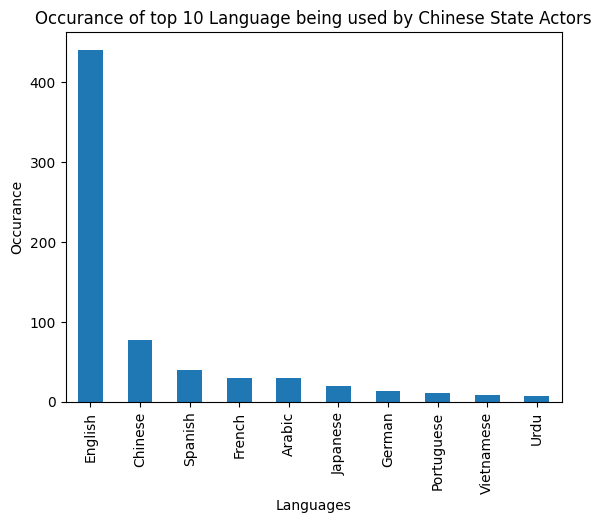

In [5]:
# Create histogram of top 10 languages being considerred by chinese state actors
import matplotlib.pyplot as plt

print("******************************************")
print("Number of unique languages being used: " + str(df['Language'].nunique()))
print("******************************************")

plt.title("Occurance of top 10 Language being used by Chinese State Actors")
plt.xlabel("Languages")
plt.ylabel("Occurance")
df['Language'].value_counts().iloc[:10].plot(kind='bar')

plt.show()


In [6]:
# Find all the rows which are using language english and has facebook URL
df_facebook = df.drop(df[df["Language"] != 'English'].index)
df_facebook = df_facebook.drop(df_facebook[df_facebook["Facebook URL"] == ""].index)
print(df_facebook.info())
print(df_facebook['Facebook URL'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 756
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name (English)           171 non-null    object 
 1   Region of Focus          171 non-null    object 
 2   Language                 171 non-null    object 
 3   Entity owner (English)   171 non-null    object 
 4   Parent entity (English)  171 non-null    object 
 5   X (Twitter) handle       171 non-null    object 
 6   X (Twitter) URL          171 non-null    object 
 7   X (Twitter) Follower #   171 non-null    object 
 8   Facebook page            171 non-null    object 
 9   Facebook URL             171 non-null    object 
 10  Facebook Follower #      171 non-null    object 
 11  Instragram page          171 non-null    object 
 12  Instagram URL            171 non-null    object 
 13  Instagram Follower #     171 non-null    object 
 14  Threads account          1

<AxesSubplot:>

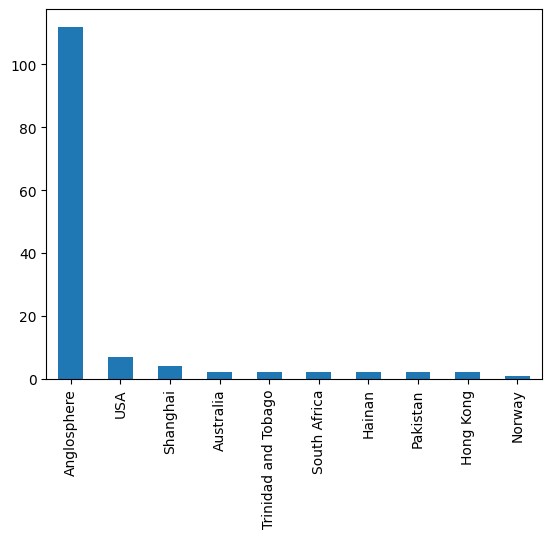

In [7]:
# Create Histogram on Region with English Language Impact
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_facebook['Region of Focus'].value_counts().iloc[:10].plot(ax=ax, kind='bar')


In [8]:
# Read the Scrapped Data from Facebook
import json
 
scrapped_facebook_json = open('facebook-20posts-english.json', encoding='utf-8')
scrapped_facebook_dict = json.load(scrapped_facebook_json)
scrapped_facebook_json.close()

print('***************************************************')
print("Total number of scrapped Posts from Facebook: " + str(len(scrapped_facebook_dict)))
print('***************************************************')



***************************************************
Total number of scrapped Posts from Facebook: 3238
***************************************************


In [9]:
# Get highest length of videos which are shared on facebook
from datetime import datetime
import time

total_time = 0
timeStampDict = {}
playbackDict = {}
postDict = {}

for post in scrapped_facebook_dict:
    if("isVideo" in post.keys()):
        for media in post["media"]:
            if ("playable_duration_in_ms" in media.keys()):
                if post["facebookUrl"] in playbackDict.keys():
                    playbackDict[post["facebookUrl"]].append(media["playable_duration_in_ms"])
                    timeStampDict[post["facebookUrl"]].append(post["timestamp"])
                    postDict[post["facebookUrl"]].append(post["text"])
                else:
                    playbackDict[post["facebookUrl"]] = [media["playable_duration_in_ms"]]
                    timeStampDict[post["facebookUrl"]] = [post["timestamp"]]
                    postDict[post["facebookUrl"]] = [post["text"]]
                
                total_time += media["playable_duration_in_ms"]

maxPlaybackTime = 0
facebookUrl = ""
for key, value in playbackDict.items():
    if (maxPlaybackTime < sum(value)):
        maxPlaybackTime = sum(value)
        facebookUrl = key

maxTimeStamp = 0
minTimeStamp = round(time.time())
for timeStamp in timeStampDict[facebookUrl]:
    if (maxTimeStamp < timeStamp):
        maxTimeStamp = timeStamp
    if (minTimeStamp > timeStamp):
        minTimeStamp = timeStamp


print("Facebook URL with highest video content: " + facebookUrl)
print("First Post Scrapped from: " + str(datetime.fromtimestamp(minTimeStamp)))
print("Last Post Scrapped from: " + str(datetime.fromtimestamp(maxTimeStamp)))
for timestamp, facebook_post in zip(timeStampDict[facebookUrl], postDict[facebookUrl]):
    print(datetime.fromtimestamp(timestamp))
    print(facebook_post)



seconds, milliseconds = divmod(maxPlaybackTime, 1000)
minutes, seconds = divmod(seconds, 60)
hours, minutes = divmod(minutes, 60)
print("Total Milliseconds: " + str(total_time) )
print("Total Hours: " + str(hours) + " Total Minutes: " + str(minutes) + " Total Seconds: " + str(seconds))


Facebook URL with highest video content: https://www.facebook.com/cgtneuropeofficial
First Post Scrapped from: 2023-11-18 05:17:45
Last Post Scrapped from: 2023-11-18 14:54:32
2023-11-18 14:54:32
WATCH LIVE: Gaza Live Shot
2023-11-18 14:05:57
🪫In 2010 - batteries made up roughly 20% of the lithium market.
 
🔋By 2021 that has soared to 74% - boosted by the #EV market which is set to DOUBLE over the next 5 years. In the UK, Cornish company Cornish #lithium,  are using old maps to extract the metal from spring water deep underground.

Read more 👇
https://stories.cgtneurope.tv/lithium/index.html
2023-11-18 13:28:45
The Spanish capital Madrid was once again packed with protesters, days after a socialist-led coalition took power in Spain.

They're angry at a deal which was made with Catalan separatists.
CGTN correspondent Ken Browne reports.
2023-11-18 13:09:44
#Palestinians flee Gaza City on foot amid #gunfire after #Israel ordered an #evacuation of the #Al-Shifa #hospital
2023-11-18 12:49:

In [10]:
# Added post text, likes, comments, share, view count and timestamp into the dataframe
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
facebook_text_df = pd.DataFrame()

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def pre_process_partition(partition_words):
    # Removal of punctuation
    partition_without_punct = [word.lower() for word in partition_words if word.isalpha() and word.isascii()]

    # Stopwords Removal
    stop_words = set(stopwords.words('english'))
    partition_without_stopwords = [word for word in partition_without_punct if word not in stop_words]
    
    # Lemmatization
    partition_lemmat = [lemmatizer.lemmatize(word) for word in partition_without_stopwords]
    return partition_lemmat

entity_col = []
region_col = []
entity_owner_col = []
parent_entity_col = []
language_col = []
facebook_followers_col = []
facebook_page_col = []
facebook_url_col = []
posts_col = []
posts_like_col = []
posts_comment_col = []
posts_share_col = []
posts_view_count_col = []
posts_timestamp_col = []
for index, row in df_facebook.iterrows():
    for post in scrapped_facebook_dict:
        if row["Facebook URL"] == post["facebookUrl"]:
            entity_col.append(row["Name (English)"])
            region_col.append(row["Region of Focus"])
            entity_owner_col.append(row["Entity owner (English)"])
            parent_entity_col.append(row["Parent entity (English)"])
            language_col.append(row["Language"])
            facebook_followers_col.append(row["Facebook Follower #"])
            facebook_page_col.append(row["Facebook page"])
            facebook_url_col.append(row["Facebook URL"])
            preprocessed_post_words = nltk.word_tokenize(post["text"].replace("'","\"").replace("’","\""))
            processed_post_words = pre_process_partition(preprocessed_post_words)
            processed_post_text = " ".join(processed_post_words) 
            posts_col.append(processed_post_text)
            posts_like_col.append(post["likes"])
            posts_comment_col.append(post["comments"])
            posts_share_col.append(post["shares"])
            if("viewsCount" in post.keys()):
                posts_view_count_col.append(post["viewsCount"])
            else:
                posts_view_count_col.append(-1)
            posts_timestamp_col.append(post["timestamp"])

facebook_text_df["Entity Name"] = entity_col
facebook_text_df["Region"] = region_col
facebook_text_df["Entity Owner Name"] = entity_owner_col
facebook_text_df["Parent Entity Name"] = parent_entity_col
facebook_text_df["Language"] = language_col
facebook_text_df["Facebook Followers Count"] = facebook_followers_col
facebook_text_df["Facebook Page"] = facebook_page_col
facebook_text_df["Facebook URL"] = facebook_url_col
facebook_text_df["Posts"] = posts_col
facebook_text_df["Posts_LikeCount"] = posts_like_col
facebook_text_df["Posts_CommentCount"] = posts_comment_col
facebook_text_df["Posts_ShareCount"] = posts_share_col
facebook_text_df["Posts_ViewCount"] = posts_view_count_col
facebook_text_df["Posts_TimeStamp"] = posts_timestamp_col
print(facebook_text_df.info())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yyyyy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yyyyy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yyyyy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Entity Name               3258 non-null   object
 1   Region                    3258 non-null   object
 2   Entity Owner Name         3258 non-null   object
 3   Parent Entity Name        3258 non-null   object
 4   Language                  3258 non-null   object
 5   Facebook Followers Count  3258 non-null   object
 6   Facebook Page             3258 non-null   object
 7   Facebook URL              3258 non-null   object
 8   Posts                     3258 non-null   object
 9   Posts_LikeCount           3258 non-null   int64 
 10  Posts_CommentCount        3258 non-null   int64 
 11  Posts_ShareCount          3258 non-null   int64 
 12  Posts_ViewCount           3258 non-null   int64 
 13  Posts_TimeStamp           3258 non-null   int64 
dtypes: int64(5), object(9)
m

In [11]:
# Write the Facebook Scraped Dataset to a csv file
facebook_text_df.to_csv("Dataset_Facebook.csv", sep=',', encoding='utf-8')


In [12]:
# Filter text with CGTN Europe
facebook_text_df = facebook_text_df[facebook_text_df["Entity Name"] == "CGTN Europe"]


In [13]:
# Apply back of words on the facebook text
from sklearn.feature_extraction.text import CountVectorizer

print("Applying Bag of Words for Feature Engineering...")
# Applying Bag Of Words for feature extraction with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2))
bow_transform = vectorizer.fit_transform(facebook_text_df['Posts'])
bow_dataframe = pd.DataFrame(bow_transform.toarray(), columns=vectorizer.get_feature_names_out())
print("Applying Bag of Words complete!!")
print(bow_dataframe)


Applying Bag of Words for Feature Engineering...
Applying Bag of Words complete!!
    account  account cgtn  activity  activity area  activity coastal  aging  \
0         0             0         0              0                 0      0   
1         0             0         0              0                 0      0   
2         0             0         0              0                 0      0   
3         0             0         0              0                 0      0   
4         0             0         0              0                 0      0   
5         0             0         1              0                 1      0   
6         0             0         0              0                 0      0   
7         0             0         0              0                 0      0   
8         0             0         0              0                 0      0   
9         0             0         1              1                 0      0   
10        0             0         0              

Creating word cloud from BOW...


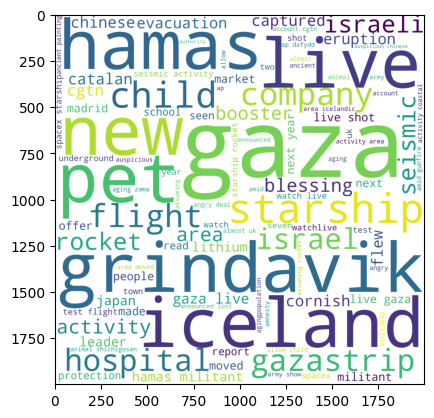

In [14]:
# Applying visualization to BOW
# Visualization of features using Word Cloud
from wordcloud import WordCloud

print("Creating word cloud from BOW...")
wc = WordCloud(background_color="white", width=2000, height=2000, max_words=100, relative_scaling=0.5,
                       normalize_plurals=False).generate_from_frequencies(bow_dataframe.sum())
plt.imshow(wc)
plt.show()
